## Los límites del método de Euler

El método de Euler puede fracasar de manera muy grave. Consideremos el sistema de un péndulo simple (sin resistencia del aire). En ese caso, la ecuación diferencial es

$$
\frac{d^2 \theta}{dt^2} + \frac{g}{l} \sin{\theta} = 0
$$

Que si definimos $v_{\theta} = \frac{d\theta}{dt}$ , la convertimos en el siguiente sistema de ecuaciones diferenciales

$$
\begin{align}
\dot{\theta} &= v_{\theta} \\
\dot{v_{\theta}} &= - \frac{g}{l} \sin{\theta} \\
\end{align}
$$

Esta ecuación es (más o menos) equivalente a un oscilador armónico simple

In [2]:
using Plots

In [3]:
function eulerVec(f,x_0,t_0,t_f,h)
    tiempos = range(t_0,stop = t_f, step = h)
    # `dim` es el tamaño del sistema de ecuaciones, que es igual a la longitud de la condicion inicial
    dim = length(x_0)
    n = length(tiempos)
    # `xs` es una matriz adonde ire guardando mis vectores x en cada pasp del tiempo como renglones
    xs = zeros(n,dim)
    # añadimos la condición inicial como el primer renglon
    xs[1,:] = x_0
    for i in 2:n
        # calculamos el siguiente término
        xs[i,:] = xs[i-1,:] + h*f(xs[i-1,:],tiempos[i-1])
    end
    return (tiempos,xs)
end

eulerVec (generic function with 1 method)

In [4]:
# penduloSimpleEuler me define la función f para un valor de l y 
# soluciona la ecuacion diferencial con eulerVec
function penduloSimpleEuler(l,x_0,t_0,t_f,h)
    # definir la función `f` que describe el sistema de ecuaciones
    function penduloSimple(Theta,t)
        # Theta es un vector cuya primera entrada es el ángulo theta y la segunda es la velocidad en theta
        # La funcion regresa la derivada de theta y de la derivada de la velocidad
        return [Theta[2],-(9.8/l)*sin(Theta[1])]
    end
    # calcular la solución utilizando `eulerVec`
    return eulerVec(penduloSimple,x_0,t_0,t_f,h)
end

penduloSimpleEuler (generic function with 1 method)

In [5]:
l = 10
# condicion incial theta = pi/8 = 22.5 grados, velocidad en theta = 0
x_0 = [pi/8,0.0]
t_0 = 0
t_f = 30
h = 1e-1
tiempos, xs = penduloSimpleEuler(l,x_0,t_0,t_f,h)

(0.0:0.1:30.0, [0.39269908169872414 0.0; 0.39269908169872414 -0.0375029763717788; … ; -1.4925866459419435 -0.36573581769694385; -1.5291602277116378 -0.26803538590625037])

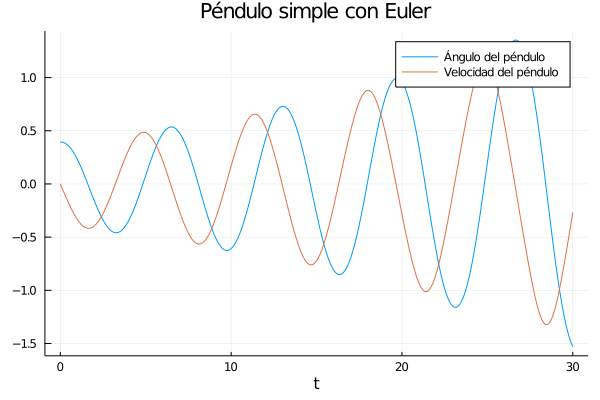

In [6]:
plot(tiempos,xs[:,1], label ="Ángulo del péndulo")
plot!(tiempos,xs[:,2], label ="Velocidad del péndulo")
title!("Péndulo simple con Euler")
xlabel!("t")

La solución obtenida crece en amplitud, lo que claramente debe de estar mal

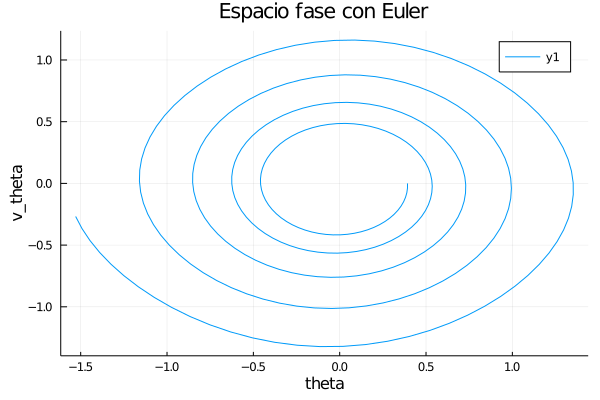

In [7]:
plot(xs[:,1],xs[:,2])
title!("Espacio fase con Euler")
xlabel!("theta")
ylabel!("v_theta")

In [8]:
n = length(tiempos)
anim = @animate for i in 1:n
    # graficamos la masa del pendulo
    scatter([-l*sin(xs[i,1])],[-l*cos(xs[i,1])],markersize=20)
    # graficamos la cuerda como una linea entre el origen y la masa
    plot!([0,-l*sin(xs[i,1])],[0,-l*cos(xs[i,1])])
    xlims!(-l,l)
    ylims!(-l*1.2,0)
    title!("Pendulo simple con Euler \n t = $(round(tiempos[i],digits=2))")
end

Animation("C:\\Users\\sayeg\\AppData\\Local\\Temp\\jl_zuj96C", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Ayudantias\ClaseFisComp_2021-1\clases\tmp.gif
└ @ Plots C:\Users\sayeg\.julia\packages\Plots\hyS17\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sayeg\\Insync\\sayeg@ciencias.unam.mx\\Google Drive\\Backup\\Ayudantias\\ClaseFisComp_2021-1\\clases\\tmp.gif")
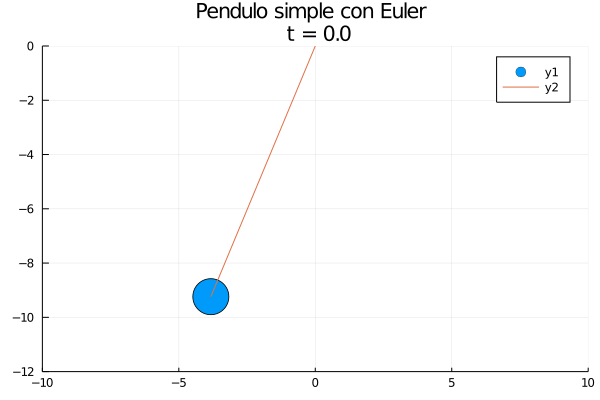

In [9]:
gif(anim,fps=30)

Es claro que el método no funciona de manera correcta. Observamos que la amplitud del péndulo aumenta. Podemos observar que sucede al ver la energía del péndulo.

Esto se vuelve todavía más drástico al analizar la energía del sistema

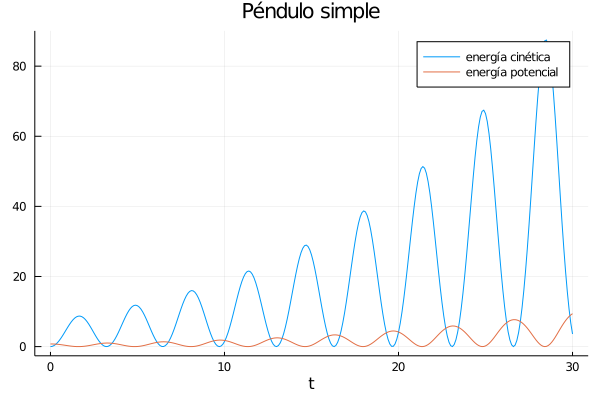

In [10]:
m = 1
cinetica = [m*(l*vtheta)^2/2 for vtheta in xs[:,2]]
potencial = [m*9.8*(1-cos(theta)) for theta in xs[:,1]]
plot(tiempos,cinetica,label="energía cinética")
plot!(tiempos,potencial,label="energía potencial")
title!("Péndulo simple")
xlabel!("t")

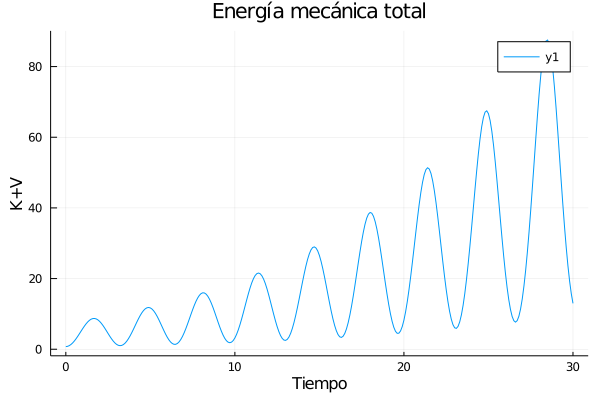

In [11]:
mecanica = potencial + cinetica
plot(tiempos,mecanica)
title!("Energía mecánica total")
xlabel!("Tiempo")
ylabel!("K+V")

Pareciera que la energía mecánica no se conserva, lo que sabemos sí debería de pasar pues no hay fuerzas de fricción o otras fuerzas no conservativas en el sistema

Queda claro que la solución obtenida por el método de Euler para el péndulo simple tiene un error demasiado grande. Por lo tanto debemos utilizar **otros métodos** que nos permitan resolver el sistema con un menor error de aproximación.

## Otros métodos simples para EDOs

### Método de Euler-Cromer

La primera modificación sencilla que podemos realizar para el caso de un solo sistema de dos ecuaciones diferenciales de la siguiente forma:

$$
\begin{align}
\dot{x} &= v(t) \\
\dot{v} &= f(x,t)
\end{align}
$$

El método consiste en actualizar **primero la velocidad** utilizando el Método de Euler:

$$
v_{i} = v_{i-1} + h f(x_{i-1},t_{i-1})
$$

Y utilizar la nueva velocidad para actualizar después la posición, también con un paso de Euler

$$
x_{i} = x_{i-1} + h v_{i}
$$

A este método se le conoce como el [**método de Euler-Cromer**](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method)

### Ejercicio 1

Implementa una función `eulerCromer(f,x_0,v_0,t_0,t_f,h)` que resuelva la ecuación diferencial dada por el sistema

$$
\begin{align}
\dot{x} &= v(t) \\
\dot{v} &= f(x,t)
\end{align}
$$

Con condiciones iniciales $x(t_0) = x_0$, $v(t_0) = v_0$, $t_f$ el tiempo final y $h$ el tamaño de paso. Recuerda, **solo para este métdodo**, que `f` debe ser una función escalar de dos variables y `x_0`, `v_0` escalares

Tu función debe de regresar los tres arreglos correspondientes a los tiempos, las posiciones y las velocidades.


### Ejercicio 2

(i) Utiliza tu función `eulerCromer` para resolver el péndulo simple y compara tus resultados con el método de Euler normal. ¿Mejora la solución?

(ii) Resuelve también el oscilador armónico simple descrito por la ecuación de segundo orden:

$$
\frac{d^2 x}{dt^2} = -k x
$$

Escoje condiciones iniciales arbitrarias **que tengan sentido físico** (i.e. no hacer 0 simultáneamente la velocidad y la posición incial). Haz una animación de la trayectoria, grafica el espacio fase y la energía como función del tiempo.

### Método del punto medio


Una desventaje del método de Euler-Cromer es que solo se puede utilizar para sistemas de ecuaciones con una forma específica (que es suficiente para nosotros pues dicha forma encaja con la mayoría de las ecuaciones de movimiento). Es posible extenderlo para resolver sistemas de ecuaciones más grandes, actualizando primero todas las velocidades y luego usando esos valores para todas las posciones.

De cualquier manera, nos gustaría tener otros métodos mejores que el de Euler para un sistema de ecuaciones diferenciales arbitrario. Recordando la forma general de un sistema de ecuaciones diferenciales:

$$
\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)
$$

que mediante el método de Euler se discretiza en el siguiente esquema:

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t),t)
$$

Una mejora, derivada de la regla de integración rectangular centrada, consiste en no evaluar $\mathbf{f}$ en $(\mathbf{x}(t),t)$, si no en $(\mathbf{x}(t+h/2),t+h/2)$, con lo que la regla se vería

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t+h/2),t+h/2)
$$

Sin embargo, un problema es que **no conocemos** $\mathbf{x}(t+h/2)$. Sin embargo, podemos aproximarlo utilizando un paso de Euler:

$$
\mathbf{x}(t+h/2) = \mathbf{x}(t) + \frac{h}{2} \;\mathbf{f}(\mathbf{x}(t),t)
$$

Usando dicha aproximación, podemos reescribir la regla del paso como

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t) + \frac{h}{2} \;\mathbf{f}(\mathbf{x}(t),t),t+h/2)
$$

Utilizando índices para notar la dependencia temporal, queda de la forma

$$
\mathbf{x}_i = \mathbf{x}_{i-1} + h \;\mathbf{f}(\mathbf{x}_{i-1} + \frac{h}{2} \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1}),t_{i-1}+h/2)
$$

Para simplificar la notación, podemos mejor definir una variable auxiliar $\mathbf{k}_1$ para representar a $\mathbf{x}(t+h/2)$:

$$
\mathbf{k}_1 = \mathbf{x}_{i-1} + \frac{h}{2} \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1})
$$

Y así escribimos el método como

$$
\mathbf{k}_1 = \mathbf{x}_{i-1} + \frac{h}{2} \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1}) \\
\mathbf{x}_i = \mathbf{x}_{i-1} + h \;\mathbf{f}(\mathbf{k}_1,t_{i-1}+h/2)
$$

A este método se le conoce como [**método (explícito) del punto medio**](https://en.wikipedia.org/wiki/Midpoint_method)

### Ejercicio 3

Implementa una función `puntoMedioVec(f,x_0,t_0,t_f,h)` con `f` la función **vectorial** tal que $\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)$, `x_0` (un vector de $n$ entradas) y `t_0` la condición inicial, `t_f` el tiempo máximo al que queremos obtener la solución y `h` el tamaño de paso. La función debe de implementar el método del punto medio y debe de regresar el arreglo de los tiempos `[t_0,t_1, t_2,....,t_n]` con $t_{n} \leq t_f < t_{n} + h$ y el de la solución a la ecuación diferencial `[x_0,x_1,...,x_n]`.

**Sugerencia 1:** Prealoca los arreglos de los tiempos y las posiciones. Utiliza una tupla para regresar ambos valores.

**Sugerencia 2** puedes utilizar `zeros(n,l)` para prealocar una matriz de zeros de $n \times l$ en la cual puedes guardar como renglones cada vector $\mathbf{x}_i$

### Ejercicio 4

Repite el ejercicio 2 utilizando ahora tu función `puntoMedioVec`. ¿Mejora respecto al método de Euler-Cromer?

### Método de Heun

Siguiendo la misma de idea del método del punto medio, podemos ahora utilizar la regla de integración trapezoidal sobre la función $\mathbf{f}$ para obtener la siguiente aproximación:

$$
\mathbf{x}(t+h) = \mathbf{x}(t) + \frac{h}{2} \left( \mathbf{f}(\mathbf{x}(t),t) + \mathbf{f}(\mathbf{x}(t+h),t+h) \right) 
$$

Nuevamente, al no conocer $\mathbf{x}(t+h)$, no podemos evaluar el lado derecho de la expresión. Lo mejor que podemos hacer es utilizar un paso de euler para aproximarlo en el lado derecho de la ecuación y así obtener la siguiente expresión


$$
\mathbf{x}(t+h) = \mathbf{x}(t) + \frac{h}{2} \left( \mathbf{f}(\mathbf{x}(t),t) + \mathbf{f}(\mathbf{x}(t)+h \;\mathbf{f}(\mathbf{x}(t),t),t+h) \right) 
$$

Nuevamente, para simplificar la notación, definimos una variable auxiliar $\mathbf{k}_1$ como

$$
\mathbf{k}_1 = \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t),t) 
$$

Y así nuestro método se puede reescribir como

$$
\begin{align}
\mathbf{k}_1 &= \mathbf{x}(t) + h \;\mathbf{f}(\mathbf{x}(t),t) \\
\mathbf{x}(t+h) &= \mathbf{x}(t) + \frac{h}{2} \left( \mathbf{f}(\mathbf{x}(t),t) + \mathbf{f}(\mathbf{k}_1 ,t+h) \right)
\end{align}
$$

Usando índices para la dependencia temportal, tenemos

$$
\begin{align}
\mathbf{k}_1 &= \mathbf{x}_{i-1} + h \;\mathbf{f}(\mathbf{x}_{i-1},t_{i-1}) \\
\mathbf{x}_i &= \mathbf{x}_{i-1} + \frac{h}{2} \left( \mathbf{f}(\mathbf{x}_{i-1},t_{i-1}) + \mathbf{f}(\mathbf{k}_1 ,t_{i}) \right)
\end{align}
$$

A este método se le conoce como [**método de Heun**](https://en.wikipedia.org/wiki/Heun%27s_method)

### Ejercicio 5

Implementa una función `heun(f,x_0,t_0,t_f,h)` con `f` la función **vectorial** tal que $\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t),t)$, `x_0` (un vector de $n$ entradas) y `t_0` la condición inicial, `t_f` el tiempo máximo al que queremos obtener la solución y `h` el tamaño de paso. La función debe de implementar el método de heun y debe de regresar el arreglo de los tiempos `[t_0,t_1, t_2,....,t_n]` con $t_{n} \leq t_f < t_{n} + h$ y el de la solución a la ecuación diferencial `[x_0,x_1,...,x_n]`.

**Sugerencia 1:** Prealoca los arreglos de los tiempos y las soluciones. Utiliza una tupla para regresar ambos valores.

**Sugerencia 2** puedes utilizar `zeros(n,l)` para prealocar una matriz de zeros de $n \times l$ en la cual puedes guardar como renglones cada vector $\mathbf{x}_i$

### Ejercicio 6

Repite el ejercicio 2 ahora utilizando tu función `Heun` y compara con los métodos de Euler-Cromer y el de punto medio.